**school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
**sex** - student's sex (binary: 'F' - female or 'M' - male)
**age** - student's age (numeric: from 15 to 22)
**address** - student's home address type (binary: 'U' - urban or 'R' - rural)
**famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
**Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
**Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
**Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
**Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
**Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
**reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
**guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
**traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
**studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
**failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
**schoolsup** - extra educational support (binary: yes or no)
**famsup** - family educational support (binary: yes or no)
**paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
**activities** - extra-curricular activities (binary: yes or no)
**nursery** - attended nursery school (binary: yes or no)
**higher** - wants to take higher education (binary: yes or no)
**internet** - Internet access at home (binary: yes or no)
**romantic** - with a romantic relationship (binary: yes or no)
**famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
**freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
**goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
**Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
**Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
**health** - current health status (numeric: from 1 - very bad to 5 - very good)
**absences** - number of school absences (numeric: from 0 to 93)

*These grades are related with the course subject, Math or Portuguese:*

**G1** - first period grade (numeric: from 0 to 20)
**G2** - second period grade (numeric: from 0 to 20)
**G3** - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_math = pd.read_csv("student-mat.csv")
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no null values in this particular dataset. Hence, data cleaning step will continue with dealing with outliers.

Text(0.5, 1.0, 'Age Distribution')

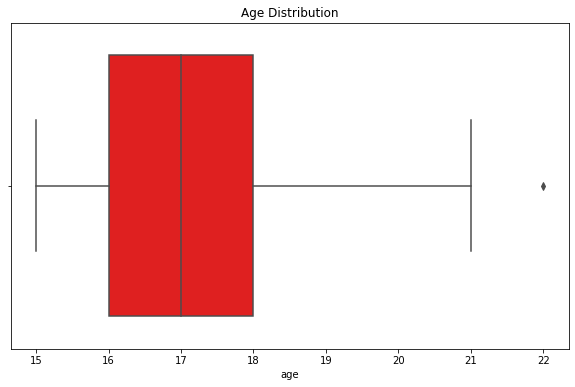

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(df_math["age"], color="red")
plt.title("Age Distribution")

In [6]:
df_math["age"].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [7]:
df_math = df_math[df_math["age"] < 20]


## Gender-Related Analysis:

In [8]:
df_math["sex"].value_counts()

F    207
M    183
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1bb5534bfa0>,
 [Text(-0.10616530669774246, 1.0948647988011007, 'F'),
  Text(0.10616530669774207, -1.0948647988011007, 'M')],
 [Text(-0.05790834910785951, 0.5971989811642366, '53.08%'),
  Text(0.0579083491078593, -0.5971989811642366, '46.92%')])

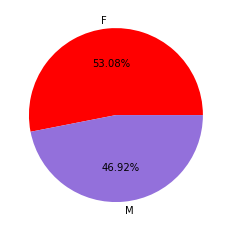

In [9]:
plt.pie(df_math["sex"].value_counts(),labels=df_math["sex"].value_counts().index, autopct='%1.2f%%', colors=["red", "mediumpurple"])

As seen above, there are fractionally more females than males.

In [10]:
wend_cons = df_math.groupby("age")["Walc"].describe()
wend_cons

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,82.0,1.902439,1.202977,1.0,1.00,1.0,3.0,5.0
16,104.0,2.278846,1.339879,1.0,1.00,2.0,3.0,5.0
17,98.0,2.571429,1.251803,1.0,1.25,3.0,3.0,5.0
18,82.0,2.414634,1.314226,1.0,1.00,2.0,3.0,5.0
19,24.0,1.958333,0.858673,1.0,1.00,2.0,3.0,3.0


In [11]:
wday_cons = df_math.groupby("age")["Dalc"].describe()
wday_cons

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,82.0,1.353659,0.743232,1.0,1.0,1.0,1.0,5.0
16,104.0,1.432692,0.878706,1.0,1.0,1.0,2.0,5.0
17,98.0,1.520408,0.899365,1.0,1.0,1.0,2.0,5.0
18,82.0,1.548780,0.944803,1.0,1.0,1.0,2.0,5.0
19,24.0,1.458333,0.779028,1.0,1.0,1.0,2.0,3.0


As seen in the dataframes above, students alchohol consumption is significally higher in the weekends, as pressumed. Furthermore - As students grow older, their tendecies for drinking alchohol, grows respectively.

The insight approached last block of code, presented visually.
As seen, the peak of alchohol consumption is around the age of seventeen.

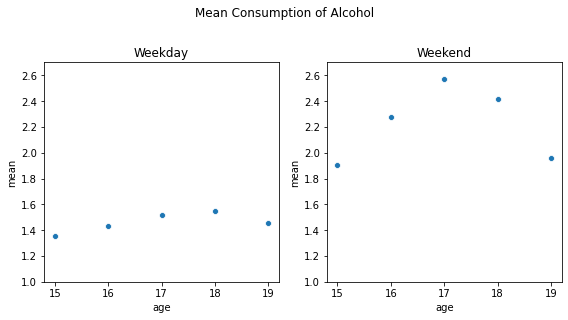

In [12]:
fig, axe = plt.subplots(1,2)
fig.set_size_inches(8, 4)
axe[0].set_title("Weekday")
axe[1].set_title("Weekend")
fig.suptitle("Mean Consumption of Alcohol", y=1.1)
sns.scatterplot(ax=axe[0],x=wday_cons.index, y=wday_cons["mean"])
sns.scatterplot(ax=axe[1],x=wend_cons.index, y=wend_cons["mean"])
axe[0].set_ylim(1.0,2.7)
axe[1].set_ylim(1.0,2.7)
plt.tight_layout()

In the figure below, I've plotted the absence count per age criteria. Interesting value we may see, is that around the age of 19, the median of absences, is far greater than the rest of the age distribution. Furthermore - the density of the students, is set around the median value. Which arise interesting questions, such as:
Do students around that age, get more responsibillities, such as job search, etc?
Are they beyond the peak of their study programs in school?


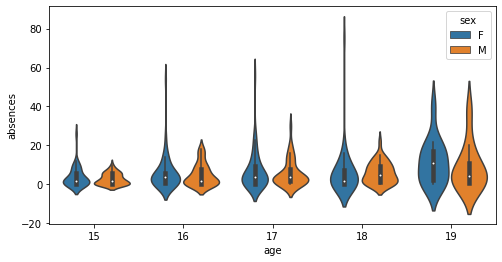

In [13]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df_math, x="age", y="absences", hue="sex")

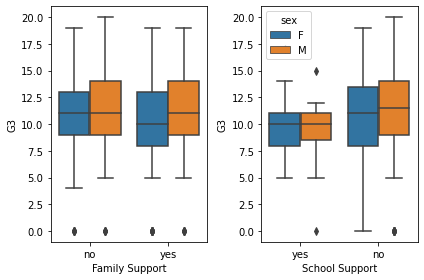

In [14]:
fig, axe = plt.subplots(1, 2)
sns.boxplot(ax=axe[1],data=df_math, x=df_math["schoolsup"],y=df_math["G3"], hue=df_math["sex"] )
sns.boxplot(ax=axe[0],data=df_math, x=df_math["famsup"],y=df_math["G3"], hue=df_math["sex"] )
axe[1].set_xlabel("School Support")
axe[0].set_xlabel("Family Support")
leg = axe[0].legend()
leg.remove()
plt.tight_layout()

In [15]:
df_educational = df_math[["famsup", "Fedu", "Medu"]]
df_educational.groupby("famsup").mean()

,Fedu,Medu
famsup,,
no,2.286667,2.500000
yes,2.687500,2.908333


I'd like to test an interesting question:
Do both schools give any support to their students, and if so, does it increment their final grade in taken courses?
As seen below, MS school does not offer school support at all.

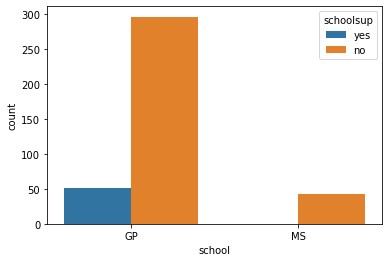

In [16]:
sns.countplot(x=df_math["school"], hue=df_math['schoolsup'])

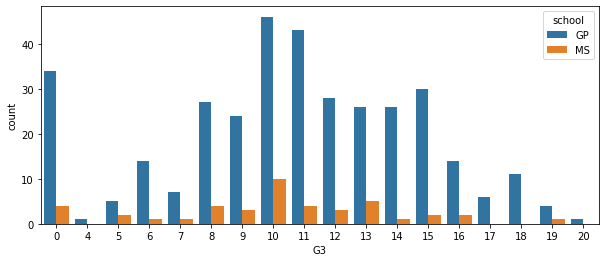

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(x=df_math["G3"],  hue=df_math["school"])

In [18]:
df_math[df_math["school"] == 'GP'].groupby('schoolsup').mean()['G3']

schoolsup
no     10.655405
yes     9.431373
Name: G3, dtype: float64

In [19]:
df_math[df_math["school"] == 'GP'].groupby(['schoolsup', 'famsup']).mean()['G3']

schoolsup  famsup
no         no        10.863636
           yes       10.532258
yes        no        10.538462
           yes        9.052632
Name: G3, dtype: float64

## Machine Learning chapter:
In this chapter, I'd like to create, train, and present a decent model, to predict a student's final grade in a given course, taken all of the features into consideration.
I will be using Regressors I have learnt in an university course, using GridSearch Algorithm, as well as Cross Validation. At last, I'd want to make a few comparisons between the best models I trained, in order to extract the best model. For future predictions that may be valuable for school representatives.

In [20]:
from sklearn import preprocessing
def label_encoding(df, label):
    label_unique = set(df[label].values)
    le = preprocessing.LabelEncoder()
    le.fit(list(label_unique))
    encoded = le.transform(df[label].values)
    df[label] = encoded

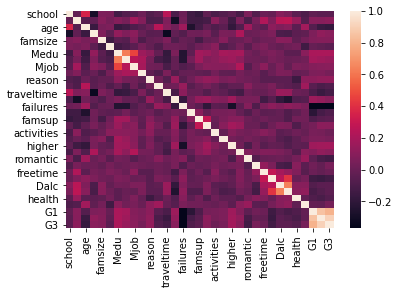

In [21]:
columns = list(df_math.columns)
df_encoded = copy.deepcopy(df_math)
for i in columns:
    if df_encoded[i].dtypes == object:
        label_encoding(df_encoded, i)
sns.heatmap(df_encoded.corr())

In [22]:
predict_val = df_encoded["G3"]
df_encoded = df_encoded.drop(["G1", "G2", "G3"], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
Models = {}
x_train, x_test, score_train, score_test = train_test_split(np.array(df_encoded),predict_val, test_size=0.3)


In [24]:
from sklearn import metrics
def errors_table(data, model, final_score):
    return_table = {}
    return_table["MAE"] = metrics.mean_absolute_error(model.predict(data), final_score)
    return_table["MSE"] = metrics.mean_squared_error(model.predict(data), final_score)
    return return_table

In [25]:
from sklearn.preprocessing import MinMaxScaler
MinMaxobj = MinMaxScaler()
MinMaxobj.fit(x_train)
x_train = MinMaxobj.transform(x_train)
x_test = MinMaxobj.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression

LRmodel = LinearRegression()
LRmodel.fit(x_train, score_train)
Models["Linear Regression"] = errors_table(x_test, LRmodel, score_test)
errors_table(x_test, LRmodel, score_test)

{'MAE': 3.5382701990690273, 'MSE': 21.503577605613742}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
Parameters = {"max_depth": [int(i) for i in np.linspace(1, 100, 10)], "min_samples_split":[float(i) for i in np.linspace(0.1, 2, 20 )], "min_samples_leaf": [1, 2, 4, 8, 16, 32, 40, 50], "max_features" : [int(i) for i in np.arange(1, len(df_encoded.columns))] }
GSmodel = GridSearchCV(DecisionTreeRegressor(), param_grid=Parameters, cv=5, return_train_score=False, n_jobs= -1)
GSmodel.fit(x_train, score_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 40, 50],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                               0.7, 0.7999999999999999,
                                               0.8999999999999999,
                                               0.9999999999999999,
                                               1.0999999999999999, 1.2, 1.3,
                                               1.4, 1.5, 1.5999999999999999,
                                               1.7, 1.8, 1.9, 2.0]})

In [28]:
Models["Decision Tree Regressor"] = errors_table(x_test, GSmodel, score_test)
errors_table(x_test, GSmodel, score_test)

{'MAE': 3.839721009443231, 'MSE': 24.099958919459848}

In [29]:
GSmodel.best_params_

{'max_depth': 67,
 'max_features': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 0.2}

In [30]:
from sklearn.neighbors import KNeighborsRegressor
Parameters = {"n_neighbors": list(range(40)), "leaf_size": list(range(40)), "p": [1, 2] }
GSmodel = GridSearchCV(KNeighborsRegressor(), param_grid=Parameters,n_jobs=-1, cv=5)
GSmodel.fit(x_train, score_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, ...],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'p': [1, 2]})

In [31]:
Models["KNNRegressor"] = errors_table(x_test, GSmodel, score_test)
errors_table(x_test, GSmodel, score_test)

{'MAE': 3.526627218934911, 'MSE': 22.859328377079855}

In [32]:
GSmodel.best_params_

{'leaf_size': 4, 'n_neighbors': 26, 'p': 1}

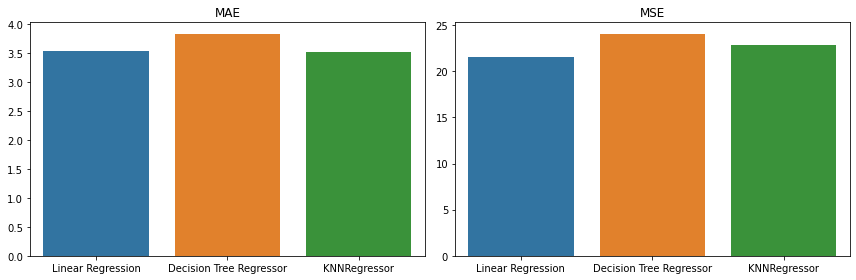

In [33]:
fig, axe = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
sns.barplot(ax=axe[0],x=list(Models.keys()), y=[Models[i]['MAE'] for i in Models.keys()])
axe[0].set_title("MAE")
sns.barplot(ax=axe[1],x=list(Models.keys()), y=[Models[i]['MSE'] for i in Models.keys()])
axe[1].set_title("MSE")
plt.tight_layout()

In [34]:
GSmodel.best_params_

{'leaf_size': 4, 'n_neighbors': 26, 'p': 1}

As presented above, the results of the Linear Regressor is not significantly better than the KNN.

The KNN with such decent results, has 4 as leaf size, 26 neighbors, and p value of 1.